In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv("/Users/pabloarranzropero/workspace-python/curso-ml-udemy/datasets/wine/winequality-red.csv", 
                    sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(array([  10.,    0.,   53.,    0.,  681.,    0.,  638.,    0.,  199.,   18.]),
 array([ 3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ]),
 <a list of 10 Patch objects>)

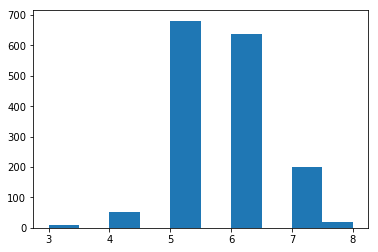

In [47]:
#Hacemos un histograma de las calidades para ver la distribución
plt.hist(data["quality"])

In [48]:
#Observamos los promedios de las features para las distintas calidades
data.groupby(data["quality"]).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


Podemos hacer varias observaciones a simple vista:
* El ácido cítrico y los sulfatos se relacionan directamente con la puntuación, o que los cloruros y la acided volátil se relacionan inversamente con la puntuación.<br>
* También tenemos otras neutras como la densidad y el pH que apenas varían.<br>
* Otras como el dióxido de sulfuro o la acided fija son muy variables.

In [49]:
#Los rangos de las variables son muy variados por lo que normalizaremos los datos
#Hay muchas maneras de normalizar, nosotros elegimos esta:
data_norm = (data - data.min()) / (data.max() - data.min())
data_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jerárquico

Hasta ahora hemos tratado los datos, ahora empieza el clustering

In [50]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(data_norm)
#Esto devuelve el cluster al que pertenece cada fila
classif = pd.Series(clustering.labels_)
classif.head(20)

0     2
1     2
2     2
3     3
4     2
5     2
6     2
7     2
8     2
9     1
10    2
11    1
12    4
13    5
14    1
15    1
16    0
17    5
18    2
19    5
dtype: int64

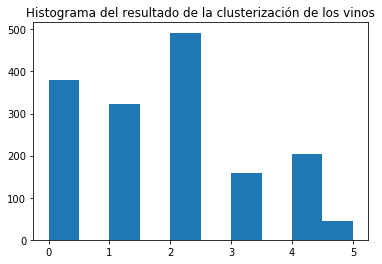

In [52]:
plt.hist(classif)
plt.title("Histograma del resultado de la clusterización de los vinos")

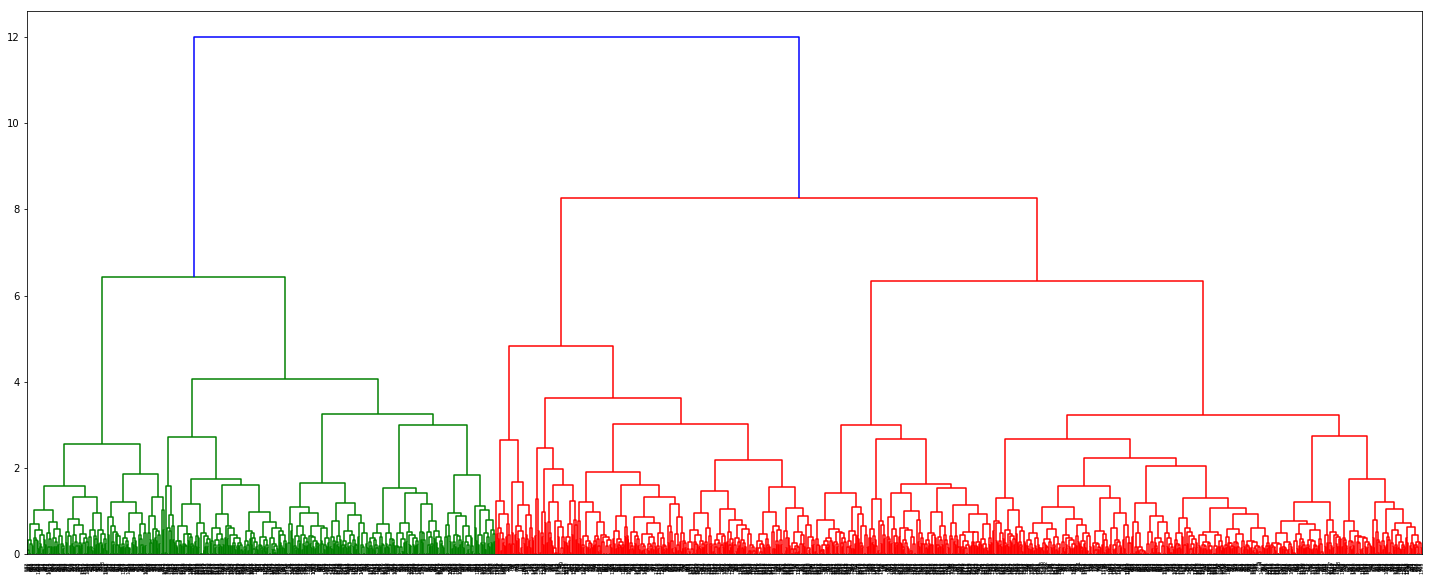

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(data_norm, method="ward")
plt.figure(figsize=(25, 10))
#También podríamos usar la función de dendrograma que nosotros creamos
dendrogram(Z, leaf_rotation=90, show_contracted=True)
plt.show()

## K-means

(array([  30.,    0.,  230.,    0.,  256.,    0.,  508.,    0.,  317.,  258.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

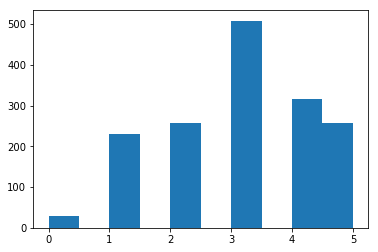

In [71]:
from sklearn.cluster import KMeans
from sklearn import datasets

model = KMeans(n_clusters=6)
model.fit(data_norm)

plt.hist(model.labels_)
#No tienen porque estar ordenados los clusters pero si que habrá uno dominante y uno con poca presencia como en el
#clustering jerárquico

In [73]:
model.cluster_centers_

array([[ 0.33716814,  0.29223744,  0.48133333,  0.07557078,  0.53789649,
         0.20938967,  0.21071849,  0.5143906 ,  0.2335958 ,  0.59001996,
         0.16512821,  0.46666667],
       [ 0.17610619,  0.32432996,  0.08913043,  0.09416319,  0.09608042,
         0.24856093,  0.12292211,  0.32587627,  0.57733653,  0.18516011,
         0.48637681,  0.61043478],
       [ 0.57677683,  0.20241599,  0.50726563,  0.13187607,  0.13031485,
         0.13743398,  0.0910032 ,  0.65313819,  0.33569144,  0.22445734,
         0.29060497,  0.55      ],
       [ 0.26395373,  0.35904298,  0.12348425,  0.09132645,  0.12283596,
         0.14482367,  0.10768343,  0.49211153,  0.48648397,  0.1554293 ,
         0.22016455,  0.43976378],
       [ 0.31657408,  0.27714878,  0.30457413,  0.15202455,  0.12698872,
         0.38048163,  0.29785645,  0.5390477 ,  0.43592737,  0.17890402,
         0.21400954,  0.45615142],
       [ 0.36290046,  0.15975098,  0.42329457,  0.10547414,  0.10543412,
         0.16350038,  

In [75]:
#Valor de la suma de los cuadrados internos
model.inertia_

186.57050813921404

Con este clustering podemos hacer varias cosas:
* Poner un precio de vino similar a los pertenecientes al mismo clustering
* Hacer una campaña de publicidad concreta para cada cluster